In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import data_clean
from datetime import date

In [210]:
player_stats = pd.read_csv("player_combined.csv", sep = '\t')
game_stats = pd.read_csv("./game_combined.csv", sep = '\t')


Function to split stats and to return the percentage in a list

In [211]:
def get_percent(lst: np.array, divider = '-'):
    lst = [char.split(sep = divider) for char in lst]
    percent_arr = []
    for  made, attempted in lst:
        if(int(made) == 0 and int(attempted) == 0):
            percent_arr.append(0)
        else:
            percent_arr.append(int(made)/int(attempted))
            
    return  percent_arr

In [212]:
def str_to_date(string:list):
    """takes a list of strings in the month/day/year format and converts it to date"""
    new_list = []
    
    for day in string:
        bank = day.split(sep = '/')
        bank = [int(i)for i in bank]
        bank[2]= bank[2] + 2000
        new_day = date(bank[2],bank[0],bank[1])
        new_list.append(new_day)
        
    return new_list
        

Cleaning up the game stats to only be the games that Baird played during her career

In [213]:
dates_player = player_stats["Date"].to_numpy()
dates_game = game_stats["Date"].to_numpy()
correct_dates = []

for i in dates_game:
    correct_dates.append(i in dates_player)
correct_dates

game_stats["correct dates"] = correct_dates

In [214]:
game_updated = game_stats[game_stats["correct dates"]== True]
game_updated = game_updated[["Date", "Score", "W/L"]]

Sorting and Combining the Data from game_updated & player_stats
#####


In [215]:
full_stats = game_updated.merge(player_stats)

In [216]:
full_stats.head(0) #grab names

,Date,Score,W/L,Opponent,PTS,MIN,FGM-FGA,3PM-3PA,FTM-FTA,REB,AST,BLK,STL,TO,PF,Year


In [217]:
full_stats["Date"] = str_to_date(full_stats["Date"].to_numpy())


In [223]:
full_stats["3%"] = get_percent(full_stats["3PM-3PA"].to_numpy(),)
full_stats["fg%"] = get_percent(full_stats["FGM-FGA"].to_numpy(),)
full_stats["ft%"] = get_percent(full_stats["FTM-FTA"].to_numpy(),)
full_stats.sort_values(by=["Date"])
full_stats;

Basic Graphing

In [ ]:
full_stats.head(0)

,Date,Score,W/L,Opponent,PTS,MIN,FGM-FGA,3PM-3PA,FTM-FTA,REB,AST,BLK,STL,TO,PF,Year,3%,fg%,ft%


In [227]:
senior = full_stats[full_stats["Year"] == "Senior"]
junior = full_stats[full_stats["Year"] == "Junior"]
freshman = full_stats[full_stats["Year"] == "Freshman"]
sophmore = full_stats[full_stats["Year"] == "Sophmore"]

Disregard below

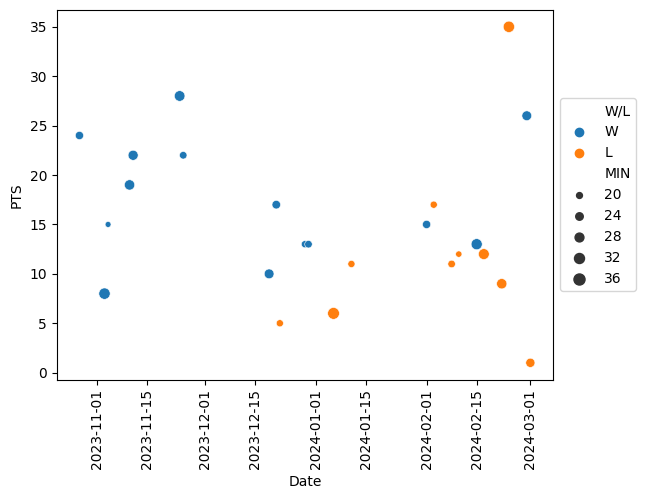

In [240]:
sns.scatterplot(data=senior, x = "Date", y = "PTS", size = "MIN", hue = "W/L")
#sns.lineplot(data=senior[senior["W/L"] == 'L'], x = "Date", y = "PTS", color = "r")
#sns.lineplot(data=senior[senior["W/L"] == 'W'], x = "Date", y = "PTS", color = 'g')

plt.xticks(rotation = 90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
